# Import Libraries

In [168]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import transformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#import preprocessing
from sklearn.pipeline import Pipeline
import unidecode

import re
import nltk
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

#import estimators
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Import evaluation metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from scipy import stats 
from scipy.stats import kurtosis,skew
import statsmodels.api as sm 
import pylab as py 

# Import/Load Dataset

In [169]:
#load csv files of datascience(ds_raw10k) and computer science(compsci_raw) into dataframes
df_compsci = pd.read_csv('compsci_raw.csv')
df_ds = pd.read_csv('ds_raw10k.csv')

## Explore Data Analysis

#### 1. Dataframe ds (DATA SCIENCE subreddit)

In [170]:
#Check shape of dataframes
df_ds.shape,df_compsci.shape

((10097, 16), (15080, 16))

In [171]:
#Show overall info of features including its datatype and contain null value or not
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10097 entries, 0 to 10096
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   author                  10097 non-null  object 
 1   author_fullname         10093 non-null  object 
 2   created_utc             10097 non-null  int64  
 3   full_link               10097 non-null  object 
 4   id                      10097 non-null  object 
 5   num_comments            10097 non-null  int64  
 6   score                   10097 non-null  int64  
 7   selftext                8160 non-null   object 
 8   subreddit               10097 non-null  object 
 9   subreddit_id            10097 non-null  object 
 10  subreddit_subscribers   10097 non-null  int64  
 11  title                   10097 non-null  object 
 12  upvote_ratio            10097 non-null  float64
 13  url                     10097 non-null  object 
 14  whitelist_status        10097 non-null

In [172]:
#Show description of dataframes
print(df_ds.describe())

        created_utc  num_comments         score  subreddit_subscribers  \
count  1.009700e+04  10097.000000  10097.000000           10097.000000   
mean   1.647028e+09      2.021888      1.058334          706693.010201   
std    5.610446e+06     13.364496      2.421727           51945.112940   
min    1.636881e+09      0.000000      0.000000          608935.000000   
25%    1.642426e+09      0.000000      1.000000          664380.000000   
50%    1.647137e+09      0.000000      1.000000          711879.000000   
75%    1.651776e+09      0.000000      1.000000          754063.000000   
max    1.656742e+09    346.000000    192.000000          783616.000000   

       upvote_ratio  
count  10097.000000  
mean       0.998665  
std        0.024419  
min        0.110000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  


**comment:**

+ average comment per post in data science subreddit is 2
+ highest engagement is 346 comments for a post

In [173]:
df_ds.describe(include='object')

,author,author_fullname,full_link,id,selftext,subreddit,subreddit_id,title,url,whitelist_status,url_overridden_by_dest
count,10097,10093,10097,10097,8160,10097,10097,10097,10097,10097,1463
unique,6968,6967,10097,10097,7994,1,1,9801,10041,2,1408
top,datascience-bot,t2_4l4cxw07,https://www.reddit.com/r/datascience/comments/...,vpl1kq,Welcome to this week's entering &amp; transiti...,datascience,t5_2sptq,Career Advice,https://www.youtube.com/watch?v=a5KmkeQ714k,all_ads,https://www.youtube.com/watch?v=a5KmkeQ714k
freq,33,33,1,1,33,10097,10097,7,5,10076,5


**comment:**

+ top comment for dsi subreddit is by author:datascience-bot with about 33 posting.

#### 2. Dataframe compsci (COMPUTER SCIENCE subreddit)

In [174]:
#Show overall info of features including its datatype and contain null value or not
df_compsci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15080 entries, 0 to 15079
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   author                  15080 non-null  object 
 1   author_fullname         14777 non-null  object 
 2   created_utc             15080 non-null  int64  
 3   full_link               15080 non-null  object 
 4   id                      15080 non-null  object 
 5   num_comments            15080 non-null  int64  
 6   score                   15080 non-null  int64  
 7   selftext                7017 non-null   object 
 8   subreddit               15080 non-null  object 
 9   subreddit_id            15080 non-null  object 
 10  subreddit_subscribers   15080 non-null  int64  
 11  title                   15080 non-null  object 
 12  upvote_ratio            9874 non-null   float64
 13  url                     15080 non-null  object 
 14  whitelist_status        15080 non-null

In [175]:
df_compsci.describe(include='object')

,author,author_fullname,full_link,id,selftext,subreddit,subreddit_id,title,url,whitelist_status,url_overridden_by_dest
count,15080,14777,15080,15080,7017,15080,15080,15080,15080,15080,4728
unique,8126,7982,15080,15080,6718,1,1,13613,14628,2,4470
top,Yuqing7,t2_2fv4yodo,https://www.reddit.com/r/compsci/comments/vpmj...,vpmjn5,\n\n???: Tooo risee againn!!!\n\n???: ..........,compsci,t5_2qhmr,This is the newest project of him?,https://medium.com/@devexpert/25-best-online-p...,all_ads,https://medium.com/@devexpert/20-best-machine-...
freq,471,471,1,1,100,15080,15080,561,13,15044,11


**comment:**

*top comment for compsci subreddit is by author:Yuqing7 with about 471 posting where:

+ average comment per post is 3
+ highest comment amount per post is 91

In [176]:
df_compsci[df_compsci['author']=='Yuqing7'].describe()

,created_utc,num_comments,score,subreddit_subscribers,upvote_ratio
count,4.710000e+02,471.000000,471.000000,4.710000e+02,199.000000
mean,1.581862e+09,2.942675,14.409766,8.116187e+05,0.976080
std,1.989740e+07,9.092603,46.023304,2.760259e+05,0.083899
min,1.545700e+09,0.000000,0.000000,4.208590e+05,0.430000
25%,1.564552e+09,0.000000,1.000000,5.789945e+05,1.000000
50%,1.578348e+09,0.000000,1.000000,7.022800e+05,1.000000
75%,1.599849e+09,1.000000,2.000000,1.049428e+06,1.000000
max,1.617323e+09,91.000000,436.000000,1.369236e+06,1.000000


In [177]:
#Show description of dataframes
print(df_compsci.describe())

        created_utc  num_comments         score  subreddit_subscribers  \
count  1.508000e+04  15080.000000  15080.000000           1.508000e+04   
mean   1.600789e+09      4.946021      5.668435           1.115336e+06   
std    3.381009e+07     13.097076     39.129174           4.906830e+05   
min    1.531820e+09      0.000000      0.000000           3.089290e+05   
25%    1.574267e+09      0.000000      1.000000           6.584458e+05   
50%    1.602664e+09      1.000000      1.000000           1.113505e+06   
75%    1.627836e+09      4.000000      1.000000           1.502691e+06   
max    1.656748e+09    341.000000   2289.000000           2.019930e+06   

       upvote_ratio  
count   9874.000000  
mean       0.978448  
std        0.108218  
min        0.070000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  


In [178]:
df_compsci.groupby(['author']).head()

,author,author_fullname,created_utc,full_link,id,num_comments,score,selftext,subreddit,subreddit_id,subreddit_subscribers,title,upvote_ratio,url,whitelist_status,url_overridden_by_dest
0,cabke241,t2_i1ab3qbr,1656748215,https://www.reddit.com/r/compsci/comments/vpmj...,vpmjn5,0,1,\n\n???: Tooo risee againn!!!\n\n???: ..........,compsci,t5_2qhmr,2019912,???: Tooo risee againn!!! ???: ........ ???: T...,1.0,https://www.reddit.com/r/compsci/comments/vpmj...,all_ads,NaN
1,cabke241,t2_i1ab3qbr,1656748213,https://www.reddit.com/r/compsci/comments/vpmj...,vpmjmg,0,1,\n\n???: Tooo risee againn!!!\n\n???: ..........,compsci,t5_2qhmr,2019912,???: Tooo risee againn!!! ???: ........ ???: T...,1.0,https://www.reddit.com/r/compsci/comments/vpmj...,all_ads,NaN
2,cabke241,t2_i1ab3qbr,1656748210,https://www.reddit.com/r/compsci/comments/vpmj...,vpmjlt,0,1,\n\n???: Tooo risee againn!!!\n\n???: ..........,compsci,t5_2qhmr,2019912,???: Tooo risee againn!!! ???: ........ ???: T...,1.0,https://www.reddit.com/r/compsci/comments/vpmj...,all_ads,NaN
3,cabke241,t2_i1ab3qbr,1656748207,https://www.reddit.com/r/compsci/comments/vpmj...,vpmjka,0,1,\n\n???: Tooo risee againn!!!\n\n???: ..........,compsci,t5_2qhmr,2019912,???: Tooo risee againn!!! ???: ........ ???: T...,1.0,https://www.reddit.com/r/compsci/comments/vpmj...,all_ads,NaN
4,cabke241,t2_i1ab3qbr,1656748204,https://www.reddit.com/r/compsci/comments/vpmj...,vpmjjg,0,1,\n\n???: Tooo risee againn!!!\n\n???: ..........,compsci,t5_2qhmr,2019912,???: Tooo risee againn!!! ???: ........ ???: T...,1.0,https://www.reddit.com/r/compsci/comments/vpmj...,all_ads,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15075,allensaakyan,NaN,1531916759,https://www.reddit.com/r/compsci/comments/8zv1...,8zv1g0,2,1,NaN,compsci,t5_2qhmr,310211,Industry Leading Programming Practices From IB...,NaN,https://www.youtube.com/watch?v=7ygdcffJHJA,all_ads,NaN
15076,CecilMWilliams,NaN,1531893199,https://www.reddit.com/r/compsci/comments/8zst...,8zstku,6,181,NaN,compsci,t5_2qhmr,309970,Assembly Language for Beginners [pdf],NaN,https://yurichev.com/writings/AL4B-EN.pdf,all_ads,NaN
15077,linternational,NaN,1531868416,https://www.reddit.com/r/compsci/comments/8zq0...,8zq0mn,0,12,NaN,compsci,t5_2qhmr,309590,Perceptrons from memristors,NaN,https://arxiv.org/abs/1807.04912,all_ads,NaN
15078,nerd4987,NaN,1531838923,https://www.reddit.com/r/compsci/comments/8zlr...,8zlr1h,1,0,NaN,compsci,t5_2qhmr,309106,How Will Data Science Evolve Over The Next Dec...,NaN,https://www.forbes.com/sites/quora/2018/07/16/...,all_ads,NaN


**comment:**

+ average comment per post in compsci subreddit is 5
+ highest engagement is 341 comments for a post

# Data preprocessing

### Define function for data preprocessing

In [202]:
#Define all function to use in cleaning data

def remove_newlines_tabs(text):
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return Formatted_text


def strip_html_tags(text):
    # Initiating BeautifulSoup object soup.
    soup = BeautifulSoup(text, "html.parser")
    # Get all the text other than html tags.
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

def remove_links(text):
    # Removing all the occurrences of links that starts with https
    remove_https = re.sub(r'http\S+', '', text)
    # Remove all the occurrences of text that ends with .com
    remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
    return remove_com

def remove_whitespace(text):
    pattern = re.compile(r'\s+') 
    Without_whitespace = re.sub(pattern, ' ', text)
    # There are some instances where there is no space after '?' & ')', 
    # So I am replacing these with one space so that It will not consider two words as one token.
    text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return text  

# Code for accented characters removal
def accented_characters_removal(text):
    # this is a docstring
    # Remove accented characters from text using unidecode.
    # Unidecode() - It takes unicode data & tries to represent it to ASCII characters. 
    text = unidecode.unidecode(text)
    return text

# Code for text lowercasing
def lower_casing_text(text):
    # Convert text to lower case
    # lower() - It converts all upperase letter of given string to lowercase.
    text = text.lower()
    return text

# Code for removing repeated characters and punctuations
def reducing_incorrect_character_repetition(text):
    # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    
    # Limiting all the  repetition to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    
    # The below statement is replacing repetition of spaces that occur more than two times with that of one occurrence.
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    return Final_Formatted

CONTRACTION_MAP = {
"ain't": "is not","aren't": "are not","can't": "cannot",
"can't've": "cannot have","'cause": "because","could've": "could have",
"couldn't": "could not","couldn't've": "could not have","didn't": "did not",
"doesn't": "does not","don't": "do not","hadn't": "had not",
"hadn't've": "had not have","hasn't": "has not","haven't": "have not",
"he'd": "he would","he'd've": "he would have","he'll": "he will",
"he'll've": "he he will have","he's": "he is","how'd": "how did",
"how'd'y": "how do you","how'll": "how will","how's": "how is",
"i'd": "i would","i'd've": "i would have","i'll": "i will",
"i'll've": "i will have","i'm": "i am","i've": "i have",
"isn't": "is not","it'd": "it would","it'd've": "it would have",
"it'll": "it will","it'll've": "it will have","it's": "it is",
"let's": "let us","ma'am": "madam","mayn't": "may not",
"might've": "might have","mightn't": "might not","mightn't've": "might not have",
"must've": "must have","mustn't": "must not","mustn't've": "must not have",
"needn't": "need not","needn't've": "need not have","o'clock": "of the clock",
"oughtn't": "ought not","oughtn't've": "ought not have","shan't": "shall not",
"sha'n't": "shall not","shan't've": "shall not have","she'd": "she would",
"she'd've": "she would have","she'll": "she will","she'll've": "she will have",
"she's": "she is","should've": "should have","shouldn't": "should not",
"shouldn't've": "should not have","so've": "so have","so's": "so as",
"that'd": "that would","that'd've": "that would have","that's": "that is",
"there'd": "there would","there'd've": "there would have","there's": "there is",
"they'd": "they would","they'd've": "they would have","they'll": "they will",
"they'll've": "they will have","they're": "they are","they've": "they have",
"to've": "to have","wasn't": "was not","we'd": "we would",
"we'd've": "we would have","we'll": "we will","we'll've": "we will have",
"we're": "we are","we've": "we have","weren't": "were not",
"what'll": "what will","what'll've": "what will have","what're": "what are",
"what's": "what is","what've": "what have","when's": "when is",
"when've": "when have","where'd": "where did","where's": "where is",
"where've": "where have","who'll": "who will","who'll've": "who will have",
"who's": "who is","who've": "who have","why's": "why is",
"why've": "why have","will've": "will have","won't": "will not",
"won't've": "will not have","would've": "would have","wouldn't": "would not",
"wouldn't've": "would not have","y'all": "you all","y'all'd": "you all would",
"y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
"you'd": "you would","you'd've": "you would have","you'll": "you will",
"you'll've": "you will have","you're": "you are","you've": "you have",
}

# The code for expanding contraction words
def expand_contractions(text, contraction_mapping =  CONTRACTION_MAP):
    # Tokenizing text into tokens.
    list_Of_tokens = text.split(' ')

    # Checking for whether the given token matches with the Key & replacing word with key's value.
    
    # Check whether Word is in lidt_Of_tokens or not.
    for Word in list_Of_tokens: 
        # Check whether found word is in dictionary "Contraction Map" or not as a key. 
         if Word in CONTRACTION_MAP: 
                # If Word is present in both dictionary & list_Of_tokens, replace that word with the key value.
                list_Of_tokens = [item.replace(Word, CONTRACTION_MAP[Word]) for item in list_Of_tokens]
                
    # Converting list of tokens to String.
    String_Of_tokens = ' '.join(str(e) for e in list_Of_tokens) 
    return String_Of_tokens    

# The code for removing special characters
def removing_special_characters(text):
    # The formatted text after removing not necessary punctuations.
    Formatted_Text = re.sub(r"[^a-zA-Z0-9:$-,%.?!]+", ' ', text) 
    # In the above regex expression,I am providing necessary set of punctuations that are frequent in this particular dataset.
    return Formatted_Text

def remove_emoji(text): 
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    without_emoji = emoji_pattern.sub(r'',text)
    return without_emoji

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

#credit to https://levelup.gitconnected.com/analyzing-donald-trump-and-joe-biden-tweets-using-natural-language-processing-c6a357b11d68
def remove_URL2(text):
    url = re.compile(r'^https?:\/\/.*[\r\n]*')
#     url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

def remove_URL3(text):
    url = re.compile(r'http\S+')
#     url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

def remove_symbol(text):
    url = re.compile(r'[‘’“”…]')
#     url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

def remove_symbol2(text):
    url = re.compile(r'\[.*?\]')
#     url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

def remove_amp(text):
    text = text.replace(' amp ','')
    return text

def text_preprocessing(data):
    data =  data.map(lambda x: remove_URL(x))
    data =  data.map(lambda x: remove_URL2(x))
    data =  data.map(lambda x: remove_URL3(x))
    data =  data.map(lambda x: remove_symbol(x))
    data =  data.map(lambda x: remove_symbol2(x))
    data =  data.map(lambda x: remove_amp(x))
    data =  data.map(lambda x: remove_emoji(x))
    data =  data.map(lambda x: remove_newlines_tabs(x))
    data =  data.map(lambda x: strip_html_tags(x))
    data =  data.map(lambda x: remove_whitespace(x))
    data =  data.map(lambda x: accented_characters_removal(x))
    data =  data.map(lambda x: lower_casing_text(x))
    data =  data.map(lambda x: reducing_incorrect_character_repetition(x))
    data =  data.map(lambda x: expand_contractions(x))
    data =  data.map(lambda x: removing_special_characters(x))
#     data =  data.map(lambda x: removing_stopwords(x))
    
    punctuations = '''\r\n!()-[]{};:'"\, <>—./?@#$%^&*_~'''

    for character in data:
        if character in punctuations:
            data = data.replace(character, ' ')

    # Instantiate PorterStemmer.
    p_stemmer = PorterStemmer()
    # Lemmatize tokens.
    data = data.map(lambda x: p_stemmer.stem(x))
    return data

In [203]:
#it show author deleted is pair with selftext null.
#this value will be remove as target variable (selftext) should not be empty
df_ds[df_ds.author=="[deleted]"].sum()

author                                 [deleted][deleted][deleted][deleted]
author_fullname                                                           0
created_utc                                                      6575173253
full_link                 https://www.reddit.com/r/datascience/comments/...
id                                                 trfplftr7sl8rc7sc0rc1wut
num_comments                                                              6
score                                                                     3
selftext                                                                  0
subreddit                      datasciencedatasciencedatasciencedatascience
subreddit_id                               t5_2sptqt5_2sptqt5_2sptqt5_2sptq
subreddit_subscribers                                               2705897
title                     A quick guide to getting more interviewsIs the...
upvote_ratio                                                           3.25
url         

In [204]:
#it show author deleted is pair with selftext null.
#this value will be remove as target variable (selftext) should not be empty
df_compsci[df_compsci.author=="[deleted]"].sum()

C:\Users\User\AppData\Local\Temp\ipykernel_36288\2363244439.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_compsci[df_compsci.author=="[deleted]"].sum()


author                   [deleted][deleted][deleted][deleted][deleted][...
author_fullname                                                          0
created_utc                                                   117379589088
full_link                https://www.reddit.com/r/compsci/comments/uy89...
id                       uy894it4889hsmkd34saui9zs0fo8pq9ydqzq2cujzp8ny...
num_comments                                                            24
score                                                                   94
subreddit                compscicompscicompscicompscicompscicompscicomp...
subreddit_id             t5_2qhmrt5_2qhmrt5_2qhmrt5_2qhmrt5_2qhmrt5_2qh...
subreddit_subscribers                                             86751416
title                    Can anyone help with this count occurrence pro...
upvote_ratio                                                         60.37
url                      https://www.reddit.com/r/compsci/comments/uy89...
whitelist_status         

In [205]:
#check shape before drop column for both dataframe
df_ds.shape,df_compsci.shape

((10097, 16), (15080, 16))

In [206]:
#create new dataframe that contain clean dataframes after drop some rows
df_compsci1 = df_compsci.drop(df_compsci[df_compsci.author=="[deleted]"].index)
df_ds1 = df_ds.drop(df_ds[df_ds.author=="[deleted]"].index)
#check new shape after delet some rows
df_ds.shape,df_compsci1.shape

((10097, 16), (15007, 16))

In [207]:
#remove rows with missing selftext's values for both dataframe
df_ds1 = df_ds.dropna(subset=['selftext'])
df_compsci1 = df_compsci1.dropna(subset=['selftext'])
#remove unnecessary column that is not helpful for creating insight and redundant such as author fullname
df_ds1 = df_ds1.drop(columns = ['url_overridden_by_dest','subreddit_id', 'whitelist_status', 'author_fullname'])
df_compsci1 = df_compsci1.drop(columns = ['url_overridden_by_dest','subreddit_id', 'whitelist_status', 'author_fullname'])

In [208]:
#check nan value in dataframe
df_ds1.isna().sum()

author                   0
created_utc              0
full_link                0
id                       0
num_comments             0
score                    0
selftext                 0
subreddit                0
subreddit_subscribers    0
title                    0
upvote_ratio             0
url                      0
dtype: int64

In [209]:
#check nan value in dataframe
df_compsci1.isna().sum()

author                      0
created_utc                 0
full_link                   0
id                          0
num_comments                0
score                       0
selftext                    0
subreddit                   0
subreddit_subscribers       0
title                       0
upvote_ratio             2615
url                         0
dtype: int64

**comment:**

+ only upvote ratio contain NaN value. This is neglectable as the feature only use for visualization only.

In [210]:
#check shape after drop column for both dataframe
df_ds1.shape,df_compsci1.shape

((8160, 12), (7016, 12))

In [211]:
#reset index to make sure no abnormal indexing after some rows are removed
df_ds1.reset_index(drop=True,inplace=True)
df_compsci1.reset_index(drop=True,inplace=True)

In [212]:
#drop some rows to balance both dataframes
last_limit = df_ds1.shape[0]
rows_remove = df_ds1.shape[0] - df_compsci1.shape[0]
start_limit = last_limit - (rows_remove) +1

print(f'There are {rows_remove} rows to remove in ds1 to balance the dataframes.\n')
print(f'The rows to remove start from {start_limit} to {last_limit}')

There are 1144 rows to remove in ds1 to balance the dataframes.

The rows to remove start from 7017 to 8160


In [213]:
#drop some rows as described above.
df_ds1_drop = df_ds1.drop(df_ds1.tail(rows_remove).index)

In [214]:
#compare shape before and after drop rows in dataframes
df_ds1.shape, df_ds1_drop.shape , df_compsci1.shape

((8160, 12), (7016, 12), (7016, 12))

In [215]:
#sub value back to dataframe intended
df_ds1 = df_ds1_drop

In [216]:
#Check for NaN value of filetered datafarme
df_ds1.isna().sum()

author                   0
created_utc              0
full_link                0
id                       0
num_comments             0
score                    0
selftext                 0
subreddit                0
subreddit_subscribers    0
title                    0
upvote_ratio             0
url                      0
dtype: int64

In [217]:
#Check for NaN value of filetered datafarme
df_compsci1.isna().sum()

author                      0
created_utc                 0
full_link                   0
id                          0
num_comments                0
score                       0
selftext                    0
subreddit                   0
subreddit_subscribers       0
title                       0
upvote_ratio             2615
url                         0
dtype: int64

#### Apply the define function for preprocessing on filtered dataset

In [218]:
#reset index as some row deleted
df_ds1.reset_index(drop=True,inplace=True)
df_compsci1.reset_index(drop=True,inplace=True)

#### Part 1: DS dataset

In [219]:
#declare new column that contain filter selftext column data
df_ds1['selftext_fix'] = df_ds1['selftext']
df_compsci1['selftext_fix'] = df_compsci1['selftext']
#filter selftex data into that new column
df_ds1['selftext_fix'] =  text_preprocessing(df_ds1['selftext_fix'])
df_compsci1['selftext_fix'] =  text_preprocessing(df_compsci1['selftext_fix'])

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [220]:
#Change datatype of filtered data as string
df_ds1['selftext_fix']  = df_ds1['selftext_fix'].astype(str)
df_compsci1['selftext_fix']  = df_compsci1['selftext_fix'].astype(str)

In [227]:
#Show original selftext's contain data
print(df_ds['selftext'].head())

0    I'm interning in a company that has no data sc...
1    I am working as a Software Developer for 2 yea...
2    Hello, I am 16 y.o. guy who started studying D...
3    Compare to someone with similar years of exper...
4    I need a new job. Been a mathematics teacher f...
Name: selftext, dtype: object


In [228]:
#Show filtered/processed selftext's contain data
print(df_ds1['selftext_fix'].head())

0    i am interning in a company that has no data s...
1    i am working as a software developer for 2 yea...
2    hello, i am 16 y.o. guy who started studying d...
3    compare to someone with similar years of exper...
4    i need a new job. been a mathematics teacher f...
Name: selftext_fix, dtype: object


In [229]:
#reset index as some row deleted
df_ds1.reset_index(drop=True,inplace=True)
df_compsci1.reset_index(drop=True,inplace=True)
#merge the dataframes 
df = pd.concat([df_ds1,df_compsci1], axis =0)
#reset and reshuffle the merged dataframes to provide randomness and avoid bias during data splitting in model training section
df.reset_index(drop=True,inplace=True)
df = df.sample(frac=1).reset_index(drop=True)

In [230]:
#Check shape of merge dataframes
df.shape

(14032, 13)

In [231]:
#save the clean and merged dataset as csv files
df_ds1.to_csv('ds1.csv',index=False)
df_compsci1.to_csv('compsci1.csv',index=False)
df.to_csv('df_combine.csv',index=False)

# Data Visualization

## Part 1: DS dataset

In [233]:
#function to find top author in both subreddit
def top_author(df,value):
    list_author = []
    for i in range(value):
        list_author.append(df.author.value_counts().sort_values(ascending = False).index[i])
    return list_author

In [234]:
# Store top 10 author in subreddit
ds_top15_raw = top_author(df_ds,15)
ds_top15_clean = top_author(df_ds1,15)

In [235]:
#store in dataframe and reset index start from zero again
df_ds_raw_top_author = df_ds[df_ds.author.isin(ds_top15_raw)==True]
df_ds_clean_top_author = df_ds1[df_ds1.author.isin(ds_top15_clean)==True]
df_ds_raw_top_author.reset_index(drop=True,inplace=True)
df_ds_clean_top_author.reset_index(drop=True,inplace=True)

In [242]:
#View what text top author write
df_ds_clean_top_author['selftext_fix'].head()

0    welcome to this week's entering & transitionin...
1    welcome to this week's entering & transitionin...
2    thought this was an interesting post (with cod...
3    say i have trained a classifier to tell me if ...
4    welcome to this week's entering & transitionin...
Name: selftext_fix, dtype: object

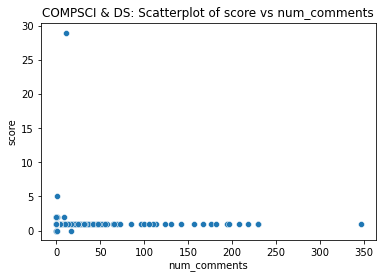

In [252]:
sns.scatterplot(data=df_ds1, x='num_comments', y='score')
plt.title('COMPSCI & DS: Scatterplot of score vs num_comments');

**comments:**

+ Figure above show no correlation between scores and number of comments in raw and filtered dataset

## Part 2: COMPSCI dataset

In [243]:
# Store top 15 author in comsci subreddit
compsci_top15_raw = top_author(df_compsci,15)
compsci_top15_clean = top_author(df_compsci1,15)

In [244]:
#create dataframe for top author for cleaned and raw dataset
df_compsci_raw_top_author = df_compsci[df_compsci.author.isin(compsci_top15_raw)==True]
df_compsci_clean_top_author = df_compsci1[df_compsci1.author.isin(compsci_top15_clean)==True]
df_compsci_raw_top_author.reset_index(drop=True,inplace=True)
df_compsci_clean_top_author.reset_index(drop=True,inplace=True)

In [249]:
#View what text top author write
df_compsci_clean_top_author['selftext'].tail(10)

877    /r/compsci strives to be the best online commu...
878    Why is `0 f x = x` equivalent to `0=\lam f . \...
879    /r/compsci strives to be the best online commu...
880    /r/compsci strives to be the best online commu...
881    /r/compsci strives to be the best online commu...
882    /r/compsci strives to be the best online commu...
883    /r/compsci strives to be the best online commu...
884    /r/compsci strives to be the best online commu...
885    What's the way around some numbers not being r...
886    /r/compsci strives to be the best online commu...
Name: selftext, dtype: object

In [247]:
df_compsci_clean_top_author['selftext_fix'].tail(10)

877     r compsci strives to be the best online commu...
878    why is 0 f x x equivalent to 0 lam f . lam x ....
879     r compsci strives to be the best online commu...
880     r compsci strives to be the best online commu...
881     r compsci strives to be the best online commu...
882     r compsci strives to be the best online commu...
883     r compsci strives to be the best online commu...
884     r compsci strives to be the best online commu...
885    what is the way around some numbers not being ...
886     r compsci strives to be the best online commu...
Name: selftext_fix, dtype: object

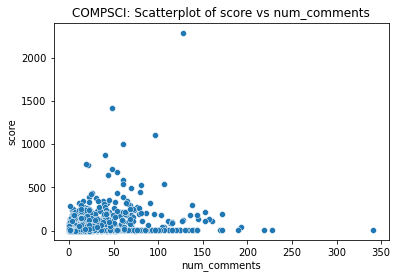

In [251]:
sns.scatterplot(data=df_compsci, x='num_comments', y='score')
plt.title('COMPSCI: Scatterplot of score vs num_comments');

**comments:**

+ figure above show no correlation between scores and number of comments in raw and filtered dataset

## Part 3: DSI + COMPSCI dataset

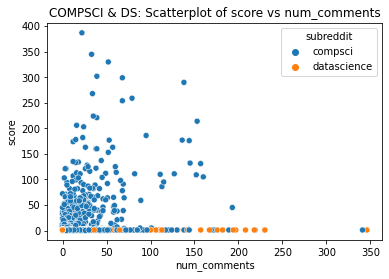

In [253]:
sns.scatterplot(data=df, x='num_comments', y='score', hue='subreddit')
plt.title('COMPSCI & DS: Scatterplot of score vs num_comments');

**comments:**

+ Only compsci in orange label slow slight correlation of number of comments slightly increase as score increases.
+ This means that it does not mean that high number of comments will contribute to high score.

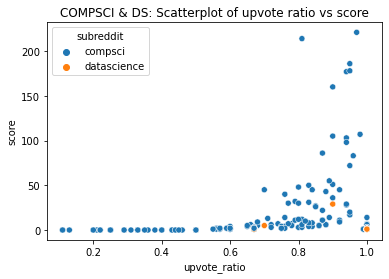

In [254]:
sns.scatterplot(data=df, x='upvote_ratio', y='score', hue='subreddit')
plt.title('COMPSCI & DS: Scatterplot of upvote ratio vs score');

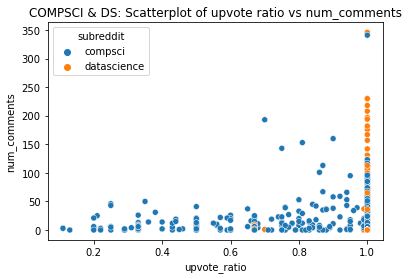

In [255]:
sns.scatterplot(data=df, x='upvote_ratio', y='num_comments', hue='subreddit')
plt.title('COMPSCI & DS: Scatterplot of upvote ratio vs num_comments');

**comments:**

+ DS subreddit has more upvote ratio towards 1.0 than compsci. This show sign of supportive community in the subreddit.
+ High upvote ratio also tends to have higher scoring marks for both subreddit

#### EDA On selftext

In [257]:
df_ds1['status_word_count']=[len(i.split(' ')) for i in df_ds1.selftext_fix]
df_ds1['status_length'] = [len(i) for i in df_ds1['selftext_fix']]
df_ds1['ratio_length_to_word'] = df_ds1['status_length']/df_ds1['status_word_count']

df_compsci1['status_word_count']=[len(i.split(' ')) for i in df_compsci1.selftext_fix]
df_compsci1['status_length'] = [len(i) for i in df_compsci1['selftext_fix']]
df_compsci1['ratio_length_to_word'] = df_compsci1['status_length']/df_compsci1['status_word_count']

In [258]:
df_ds1[['status_length','status_word_count','ratio_length_to_word']].describe()

,status_length,status_word_count,ratio_length_to_word
count,7016.000000,7016.000000,7016.000000
mean,712.565422,130.883837,5.357018
std,778.798303,137.552552,0.603711
min,1.000000,1.000000,0.500000
25%,292.000000,54.000000,5.128131
50%,512.000000,95.000000,5.356243
75%,870.250000,161.000000,5.611663
max,15561.000000,2407.000000,9.602941


In [259]:
df_compsci1[['status_length','status_word_count','ratio_length_to_word']].describe()

,status_length,status_word_count,ratio_length_to_word
count,7016.000000,7016.000000,7016.000000
mean,565.442417,103.651796,5.412064
std,695.335376,124.889329,6.676797
min,1.000000,1.000000,0.500000
25%,206.000000,39.000000,5.000000
50%,394.000000,73.000000,5.333333
75%,704.250000,125.000000,5.702720
max,14191.000000,2666.000000,480.000000


**comments:**

+ Ds has max status length higher than compsci but lower status word count.
+ Average status or post length for ds is 712 and compsci is 565.

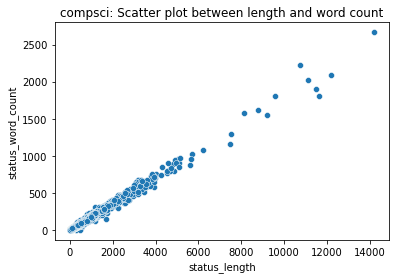

In [260]:
sns.scatterplot(data=df_compsci1, x='status_length', y='status_word_count')
plt.title('compsci: Scatter plot between length and word count');

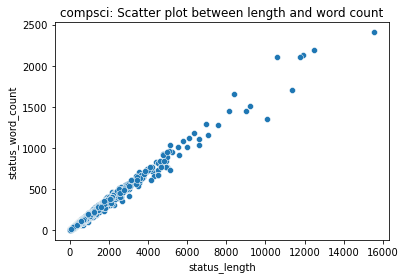

In [261]:
sns.scatterplot(data=df_ds1, x='status_length', y='status_word_count')
plt.title('compsci: Scatter plot between length and word count');

**comments:**

+ FRom both figure above, the correlation show that higher post length might contain more word count in a post

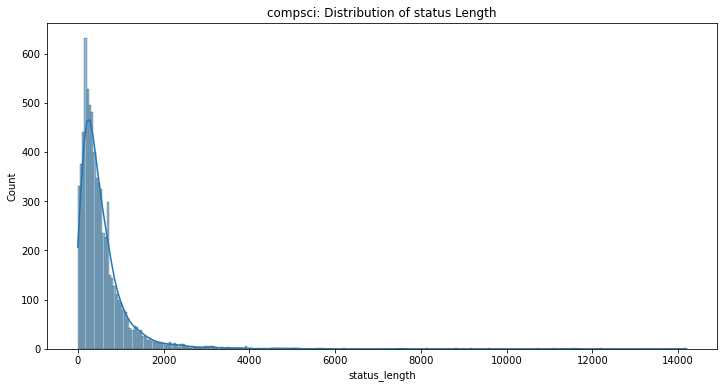

In [264]:
plt.figure(figsize=(12,6))
sns.histplot(df_compsci1['status_length'],kde=True)
plt.title('compsci: Distribution of status Length');

Skewness: 6.788906574552096 

Kurtosis: 86.11276298774011


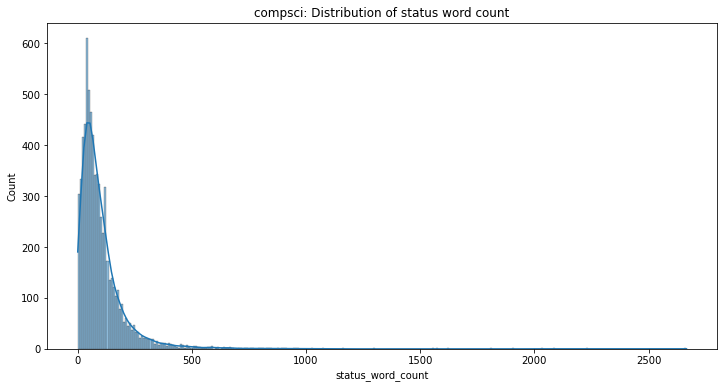

In [265]:
#Not normalize plot
plt.figure(figsize=(12,6))
sns.histplot((df_compsci1['status_word_count']),kde=True)
plt.title('compsci: Distribution of status word count');
print('Skewness:',skew((df_compsci1['status_word_count'])),'\n')
print('Kurtosis:', kurtosis((df_compsci1['status_word_count'])))

Skewness: -0.8105170015250748 

Kurtosis: 1.8747987098655061


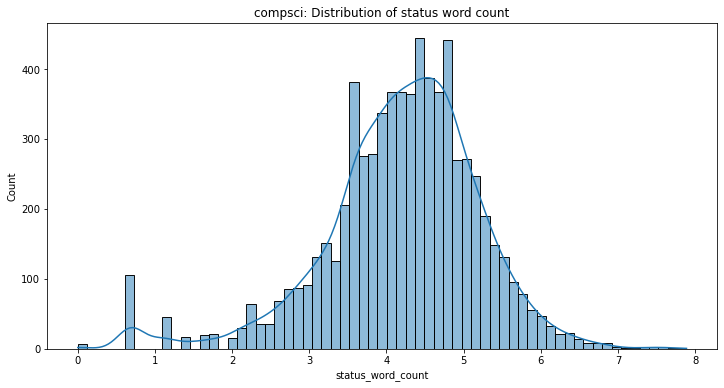

In [266]:
#Almost Normalize plot
plt.figure(figsize=(12,6))
sns.histplot(np.log(df_compsci1['status_word_count']),kde=True)
plt.title('compsci: Distribution of status word count');
print('Skewness:',skew(np.log(df_compsci1['status_word_count'])),'\n')
print('Kurtosis:', kurtosis(np.log(df_compsci1['status_word_count'])))

**comments:**

+ Both figure show distribution of word count in post is positively right skewed and become almost normally distributed in the last figure.
+ recall that kurtosis = measure of thickness of tail in distribution
+ normal distribution tend to have kurtosis near 3 & skewness = 0. If value not like that, could have non normality distributed
+ -ve skew value = left tail skewness

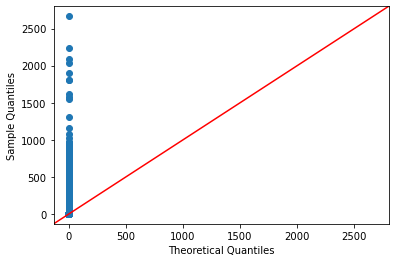

In [267]:
#Plot QQplot for non log values
sm.qqplot((df_compsci1['status_word_count']), line ='45') 
py.show()

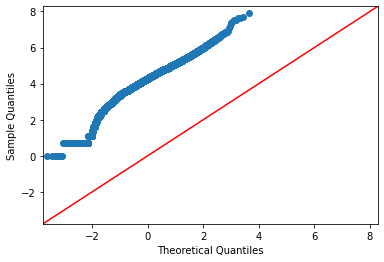

In [268]:
#Plot QQplot for log values
sm.qqplot(np.log(df_compsci1['status_word_count']), line ='45') 
py.show()

## EDA on WORD COUNT

In [269]:
cv_ds_fix = CountVectorizer(stop_words='english')
cv_comscifix = CountVectorizer(stop_words='english')

In [270]:
cv_ds_fix.fit(df_ds1['selftext_fix'])
cv_comscifix.fit(df_compsci1['selftext_fix'])

CountVectorizer(stop_words='english')

In [271]:
ds1_cv = cv_ds_fix.transform(df_ds1['selftext_fix'])
compsci1_cv = cv_comscifix.transform(df_compsci1['selftext_fix'])

In [272]:
df_ds1_cv = pd.DataFrame(ds1_cv.todense(), columns = cv_ds_fix.get_feature_names())
df_compsci1_cv = pd.DataFrame(compsci1_cv.todense(), columns = cv_comscifix.get_feature_names())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [273]:
df_compsci1_cv.head(2)

,00,000,0000,000000,00000000,00000011,000001,000002,00001101,00006950,...,zulfi,zur,zurich,zuse,zustrichalas,zvinuvatila,zw,zx,zxioaizxazozxoz,zxy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

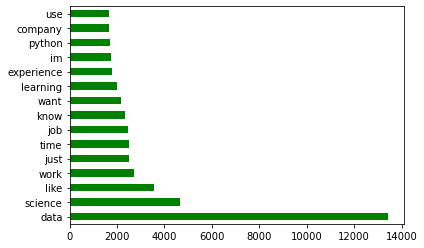

In [274]:
# Show top 15 words use in ds subreddit
df_ds1_cv.sum().sort_values(ascending=False).head(15).plot(kind = 'barh',color = 'g')

<AxesSubplot:>

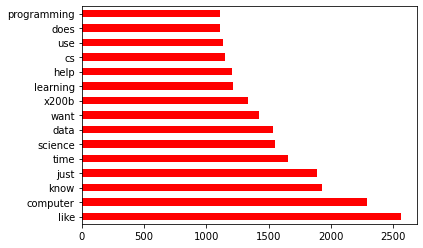

In [275]:
# Show top 15 words use in compsci subreddit
df_compsci1_cv.sum().sort_values(ascending=False).head(15).plot(kind = 'barh',color='r')

## Sentiment Analysis

In [280]:
#initialize sentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
sent.polarity_scores('kacak')#testing

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [281]:
#create list to store sentiment score
sentiment_score_ds = []
sentiment_score_compsci = []

for i in df_ds1['selftext_fix']:
    sentiment_score_ds.append(sent.polarity_scores(i))
    
for i in df_compsci1['selftext_fix']:
    sentiment_score_compsci.append(sent.polarity_scores(i))

In [282]:
sentiment_score_ds_df = pd.DataFrame(sentiment_score_ds)
sentiment_score_compsci_df = pd.DataFrame(sentiment_score_compsci)

In [283]:
sentiment_score_ds_df.mean()

neg         0.031002
neu         0.844848
pos         0.116877
compound    0.566237
dtype: float64

In [162]:
sentiment_score_compsci_df.mean()

neg         0.035421
neu         0.843367
pos         0.110946
compound    0.449327
dtype: float64

**comments:**

+both subreddit have majority of neutral post. This is expected as these forum is more of proper and civilize forum

# Word Cloud

In [289]:
# credit to: https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
#         stopwords=stopwords,
        max_words=3000,
        max_font_size=42, 
        scale=3,
        random_state=42 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [290]:
df.columns

Index(['author', 'created_utc', 'full_link', 'id', 'num_comments', 'score',
       'selftext', 'subreddit', 'subreddit_subscribers', 'title',
       'upvote_ratio', 'url', 'selftext_fix'],
      dtype='object')

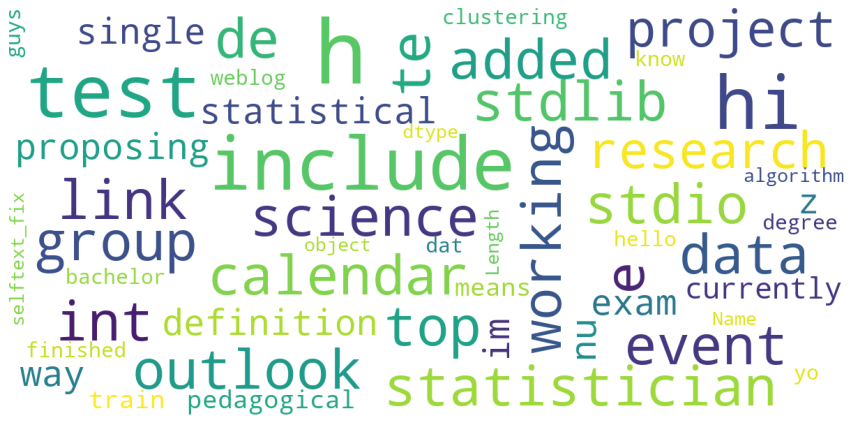

In [291]:
show_wordcloud(df['selftext_fix'])

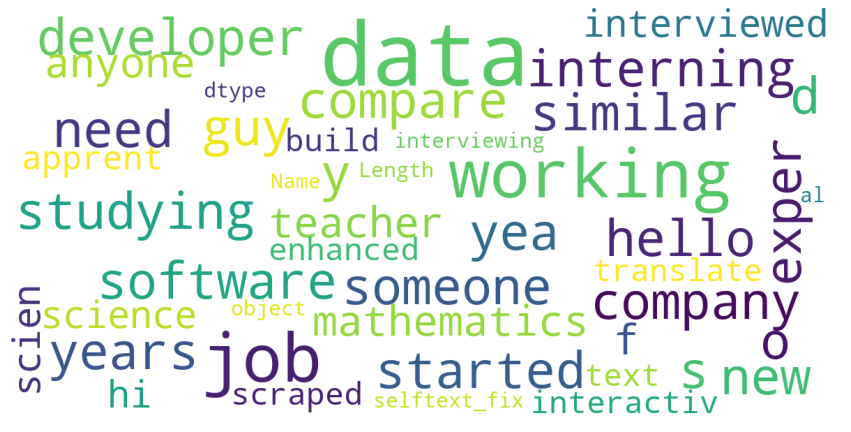

In [292]:
show_wordcloud(df_ds1['selftext_fix'])

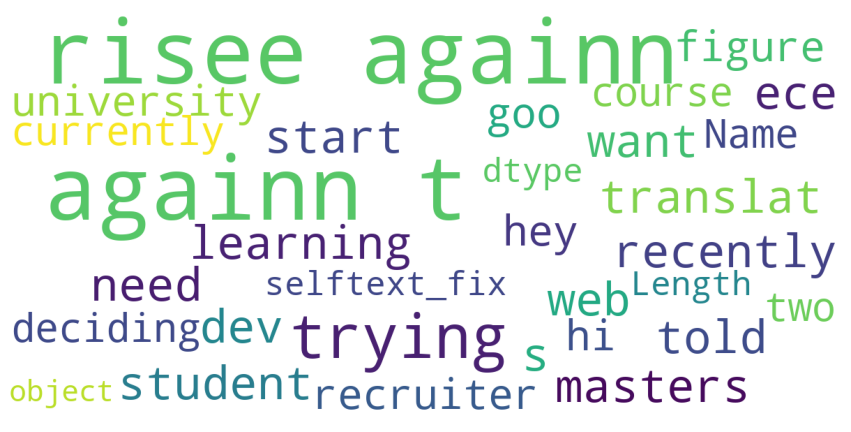

In [293]:
show_wordcloud(df_compsci1['selftext_fix'])

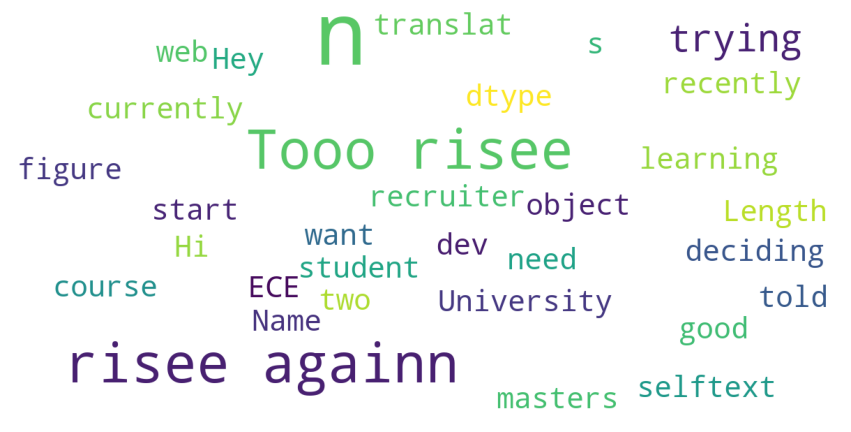

In [294]:
show_wordcloud(df_compsci1['selftext'])

# Model Preparation

In [295]:
#encode subreddit data as 0 and comsci as 1
df.subreddit = df.subreddit.map({'datascience':0 , 'compsci':1})

In [303]:
#Assign target and feature variable into y and X respectively
X = df['selftext_fix'].astype(str)
y = df['subreddit']

In [304]:
#Check for unbalance data before training.
#Data look balance with ratio 50:50
y.value_counts(normalize = True)

1    0.5
0    0.5
Name: subreddit, dtype: float64

In [305]:
#Split train and test data by ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42)

In [306]:
# #Instantiate transformer
# cvec = CountVectorizer()
# tvec = TfidfVectorizer()
# #Instantiate ML model/estimator
# knn = KNeighborsClassifier()
# logreg = LogisticRegression()

In [310]:
# Define pipeline that contain transformer and ML model 
pipe1 = Pipeline([('tvec',TfidfVectorizer()),
                  ('nb',MultinomialNB())])

pipe_cvec_nb_stem = Pipeline([('cvec', CountVectorizer()),
                              ('nb', MultinomialNB())])

In [311]:
#Define parameter for each pipeline 
pipe_params1 = {'tvec__max_features':[2000, 3000, 4000, 5000],
               'tvec__min_df': [2,3],
               'tvec__max_df': [.9,.95],
                'tvec__stop_words' : [None,'english'],
               'tvec__ngram_range': [(1,1),(1,2),(2,2)]
              }

pipe_cvec_nb_params_stem = {
    'cvec__stop_words': ['english'],
    'cvec__max_features': [2000, 3000, 4000, 5000], #only top n words from the corpus
    'cvec__min_df': [2, 3], # word must occur at least 2/4 from the corpus
    'cvec__max_df': [.9,.95], #ignore words that occur 
    'cvec__ngram_range': [(1,1), (1,2), (2,2)], #1gram, 1-gram and 2-gram
       # default is None
}


In [312]:
# Instantiate GridSearchCV for each pipeline.
gs1 = GridSearchCV(pipe1, 
                  param_grid = pipe_params1,
                  cv = 5) # 5-fold cross-validation.

gs_cvec_nb_stem = GridSearchCV(pipe_cvec_nb_stem, 
                          param_grid=pipe_cvec_nb_params_stem, 
                          cv=5
                          ) 

# Model Training & Evaluation

### Multionomial Naive Bayes + Tfid Evaluation

In [313]:
gs1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
                         'tvec__stop_words': [None, 'english']})

In [314]:
# Score model on training set.
print(gs1.score(X_train,y_train),'\n')
# Score model on testing set.
print(gs1.score(X_test,y_test))

0.8881069042316259 

0.8849305308158176


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


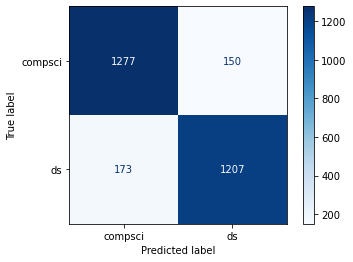

In [322]:
plot_confusion_matrix(gs1, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['compsci', 'ds']);

In [320]:
preds = gs1.predict(X_test)
# Generate a confusion matrix.
confusion_matrix(y_test,preds)

array([[1277,  150],
       [ 173, 1207]], dtype=int64)

In [327]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
specificity = tn / (tn + fp)

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print(f'Specificity: {round(specificity, 4)}')
print(f'Precision: {round(precision_score(y_test, preds), 4)}')
print(f'Sensitivity: {round(recall_score(y_test, preds), 4)}')
print(f'F1 score: {round(f1_score(y_test, preds), 4)}')
print(f'ROC AUC score: {round(roc_auc_score(y_test, preds), 4)}')

True Negatives: 1277
False Positives: 150
False Negatives: 173
True Positives: 1207
Specificity: 0.8949
Precision: 0.8895
Sensitivity: 0.8746
F1 score: 0.882
ROC AUC score: 0.8848


### Multionomial Naive Bayes + CountVectorize Evaluation

In [328]:
gs_cvec_nb_stem.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
                         'cvec__stop_words': ['english']})

In [329]:
# Score model on training set.
print(gs_cvec_nb_stem.score(X_train,y_train),'\n')
# Score model on testing set.
print(gs_cvec_nb_stem.score(X_test,y_test))

0.884543429844098 

0.8799429996437478


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


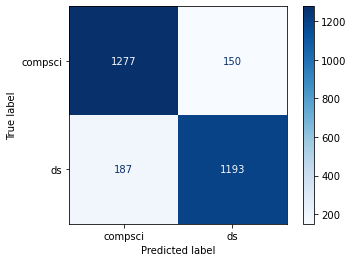

In [330]:
plot_confusion_matrix(gs_cvec_nb_stem, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['compsci', 'ds']);

In [331]:
preds = gs_cvec_nb_stem.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
specificity = tn / (tn + fp)

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print(f'Specificity: {round(specificity, 4)}')
print(f'Precision: {round(precision_score(y_test, preds), 4)}')
print(f'Sensitivity: {round(recall_score(y_test, preds), 4)}')
print(f'F1 score: {round(f1_score(y_test, preds), 4)}')
print(f'ROC AUC score: {round(roc_auc_score(y_test, preds), 4)}')

True Negatives: 1277
False Positives: 150
False Negatives: 187
True Positives: 1193
Specificity: 0.8949
Precision: 0.8883
Sensitivity: 0.8645
F1 score: 0.8762
ROC AUC score: 0.8797


**comments:**

+ Multinomial Naïve Bayes with TfidVectorizer is chosed as the best model as it produce the highest accuracy mark for this study.
+ Model is slightly overfit and can be further improve using other classification  model
+ Few possible reason are:
    + train data is not enough. This is proved as I increase from initial data of 2000 to 6000, train score drop from 95% to 88% but increase test score from 80% to 88%
    + data still contain unnecessary symbol including emoji which cause inaccurate prediction